In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

import os
from PIL import Image
import PIL.ImageOps    

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing
from skimage.color import rgb2gray

Watershed with binarization first

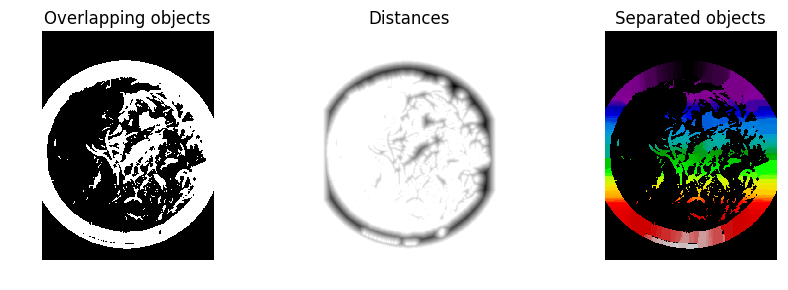

In [6]:
arraydirectory= './edge_array/'
photodirectory='./photos/'

image=np.array(Image.open(photodirectory + '1449.jpg'))
image = rgb2gray(image)
thresh = threshold_otsu(image)
img_bin = image > thresh
image_closed=binary_closing(img_bin)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image_closed)
local_maxi = peak_local_max(distance, indices=False)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image_closed)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image_closed, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

Watershed on image itself

In [ ]:
arraydirectory= './edge_array/'
photodirectory='./photos/'

image=np.array(Image.open(photodirectory + '1449.jpg'))
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

So we use Watershed on the binary picture.

In [7]:
arraydirectory= '../FeatureSampleFoodClassification/watershed_array/'
photodirectory='../SampleFoodClassifier/'

if not os.path.exists(arraydirectory):
    os.makedirs(arraydirectory)
    
for fn in os.listdir(photodirectory):
    if os.path.isfile(photodirectory + fn) and '.jpg' in fn:
        
        
        img=np.array(Image.open(photodirectory + fn))
        img = rgb2gray(img)
        thresh = threshold_otsu(img)
        img_bin = img > thresh
        img_closed=binary_closing(img_bin)
        # Now we want to separate the two objects in image
        # Generate the markers as local maxima of the distance to the background
        distance = ndi.distance_transform_edt(img_closed)
        local_maxi = peak_local_max(distance, indices=False)
        markers = ndi.label(local_maxi)[0]
        ws = watershed(-distance, markers, mask=img_closed)
        ws_flat=[item for sublist in ws for item in sublist]
        np.save(arraydirectory + fn,ws_flat)
        
print(1)

1
